In [1]:
import tensorflow as tf
import tensorflow.keras as keras
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

Tensorflow version: 2.6.0
Keras version: 2.6.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Training the model

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
# Elk element heeft een waarde tss 0 en 9.
# Dit komt overeen met de waarden in de lijst class_names
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

1
1
1
1


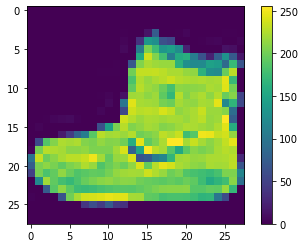

In [9]:
plt.figure()
print('1')
plt.imshow(train_images[0])
print('1')

plt.colorbar()
print('1')
plt.grid(False)
print('1')
plt.show()

In [10]:
# Scaling
train_images = train_images / 255.0
test_images = test_images / 255.0

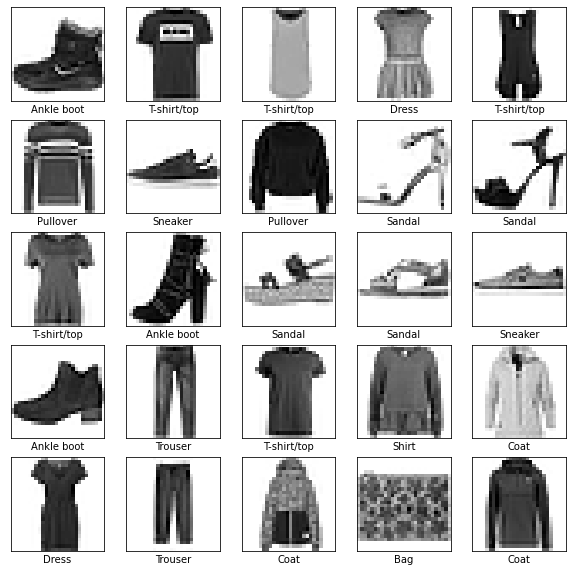

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
print('Something')

Something


In [13]:
model = tf.keras.Sequential([
    # transforms format from 2d array to 1d array:
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # 2 fully connected layers:
    tf.keras.layers.Dense(128, activation='relu'),
    # returns logits array with length 10 (labels)
    tf.keras.layers.Dense(10)
])

In [14]:
model.output_shape

(None, 10)

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4963 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3733 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3354 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3116 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2929 - accuracy: 0.8930
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2816 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2693 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2588 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2482 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3416 - accuracy: 0.8810


## Using the model on images

### Output logits to probabilities

In [18]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

### Make predictions on test data set and put output in array

In [19]:
predictions = probability_model.predict(test_images)

In [20]:
predictions[0]

array([2.8917154e-06, 2.1393123e-09, 4.7617319e-09, 9.1102730e-11,
       3.0499113e-08, 1.5804380e-03, 1.0305553e-05, 5.9816940e-03,
       5.7069851e-06, 9.9241900e-01], dtype=float32)

In [21]:
print(
    f"Does the index of the maximum probability ({np.argmax(predictions[0])}) in the output array equal the index ({test_labels[0]}) in the test label array?")

Does the index of the maximum probability (9) in the output array equal the index (9) in the test label array?


In [22]:
predictions[0][9]

0.992419

In [37]:
sum([ np.argmax(predictions[i]) == test_labels[i] for i in range(len(test_labels)) ]) / 10000

0.881

### Plotting the output and the labels

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

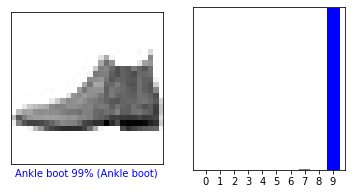

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

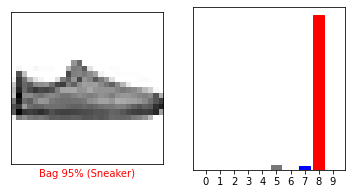

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [26]:
type(test_images)

numpy.ndarray

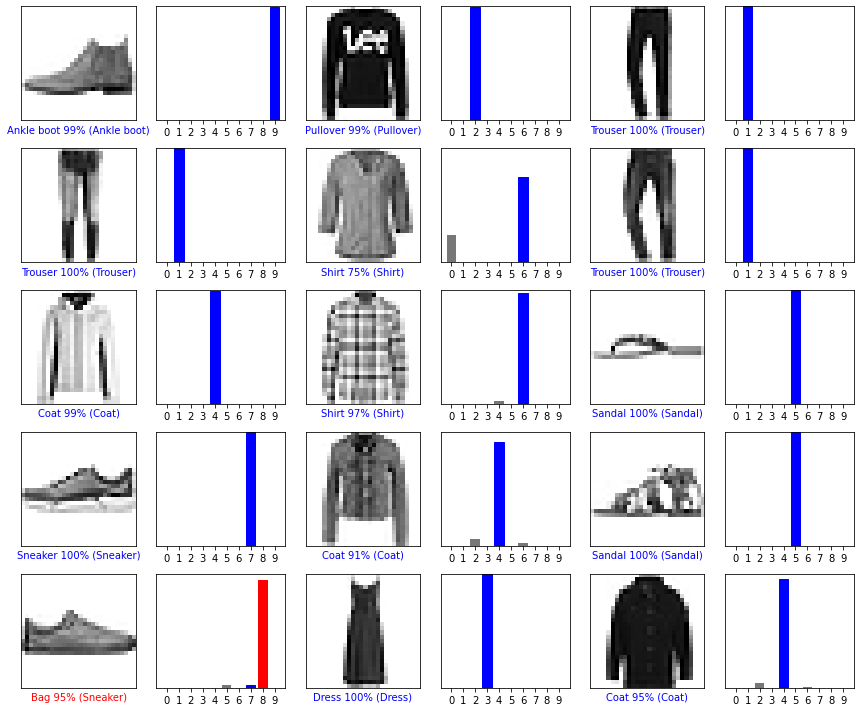

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Single prediction

In [28]:
img = test_images[0]
img.shape

(28, 28)

In [29]:
img = (np.expand_dims(img, 0))
img.shape

(1, 28, 28)

In [30]:
prediction_single = probability_model.predict(img)
prediction_single

array([[2.8917209e-06, 2.1393123e-09, 4.7617319e-09, 9.1102730e-11,
        3.0499173e-08, 1.5804388e-03, 1.0305573e-05, 5.9817000e-03,
        5.7069742e-06, 9.9241900e-01]], dtype=float32)

In [31]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

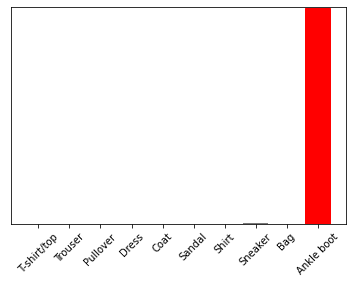

In [32]:
plot_value_array(1, prediction_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [33]:
print(f"It is {prediction_single[0][np.argmax(prediction_single)]} sure that it is a {class_names[np.argmax(prediction_single)]}")

It is 0.9924190044403076 sure that it is a Ankle boot


In [34]:
prediction_single

array([[2.8917209e-06, 2.1393123e-09, 4.7617319e-09, 9.1102730e-11,
        3.0499173e-08, 1.5804388e-03, 1.0305573e-05, 5.9817000e-03,
        5.7069742e-06, 9.9241900e-01]], dtype=float32)